In [2]:
from ansys.mapdl.core import launch_mapdl

path = 'c:\\Users\\ebers\\Simulations\\MRN412\\Testing Scripting'



lenght = 0.1
width = 0.3
thickness = 0.002
YoungsModulus = 290E9
Density = 7800
PoisonRatio = 0.3


mapdl = launch_mapdl(run_location=path, jobname='TestingScripting',override=True)

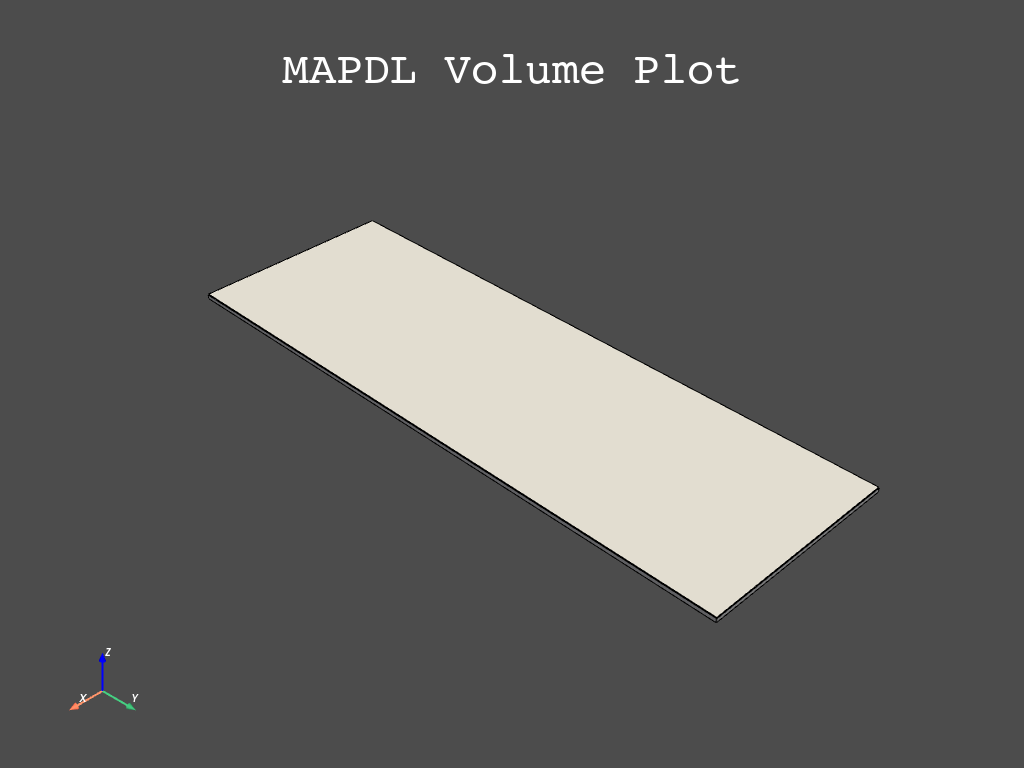

In [9]:


## General Setup
mapdl.clear()
mapdl.prep7()
mapdl.units("SI")  # SI - International system (m, kg, s, K).

##Geometry
mapdl.block(0,lenght,0,width,0,thickness)
mapdl.vplot('all')



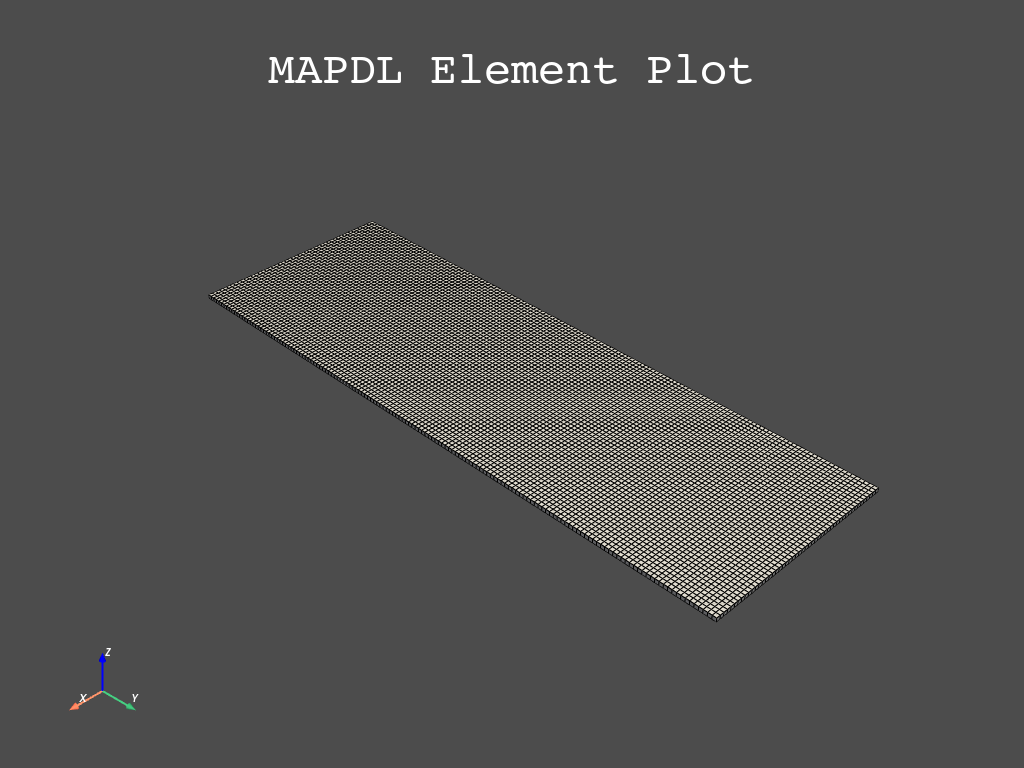

In [11]:
## Material properties
mapdl.lesize('ALL',thickness, layer1=1) ### check seeds.

mapdl.mp('ex',1,YoungsModulus)
mapdl.mp('nuxy',1,PoisonRatio)
mapdl.mp('dens',1,Density)

mapdl.et(1, 186)
mapdl.esize(thickness)
mapdl.vsweep("all")


mapdl.mshape(1,'3D')
mapdl.mshkey(0)
mapdl.vmesh('all')
mapdl.eplot()


In [17]:
mapdl.run("/SOLU")
mapdl.antype("MODAL")
output = mapdl.modal_analysis(nmode=8, freqb=1)
# output = mapdl.solve()
print(output)


*** NOTE ***                            CP =      34.453   TIME= 08:03:16
 The automatic domain decomposition logic has selected the MESH domain   
 decomposition method with 2 processes per solution.                     

 *****  ANSYS SOLVE    COMMAND  *****

 *** NOTE ***                            CP =      34.469   TIME= 08:03:16
 There is no title defined for this analysis.                            

 *** NOTE ***                            CP =      34.469   TIME= 08:03:16
 No modes are being expanded (MXPAND command) and therefore the element  
 results will not be written to the mode file.  If you do not intend to  
 use mode selection and for more efficient calculation of element        
 results in the expansion pass of any downstream mode superposition      
 analyses, expand all modes during the modal analysis.                   

 *** SELECTION OF ELEMENT TECHNOLOGIES FOR APPLICABLE ELEMENTS ***
                ---GIVE SUGGESTIONS ONLY---

 ELEMENT TYPE         1 IS SOL

In [13]:
# grab the result object from MAPDL
result = mapdl.result
print(result)

PyMAPDL Result
Units       : User Defined
Version     : 22.1
Cyclic      : False
Result Sets : 10
Nodes       : 53503
Elements    : 7500


Available Results:
NSL : Nodal displacements



In [14]:
print(result.no)

<bound method Result.nodal_solution of PyMAPDL Result
Units       : User Defined
Version     : 22.1
Cyclic      : False
Result Sets : 10
Nodes       : 53503
Elements    : 7500


Available Results:
NSL : Nodal displacements
>


In [6]:
#print(mapdl)
mapdl.exit()